<div style="background-color: #c1f2a5">


# PS2
    
# Part 1    

The idea of reasoning by following simple rules provides an attractively straightforward characterization of cognition. However, production systems can be very difficult to design in ways that are guaranteed to always work. In this problem, you will write some functions to help you work with production systems, and then you will use those functions to reason about several different sets of rules.

## Instructions



Remember to do your problem set in Python 3. Fill in `#YOUR CODE HERE`.

Make sure: 
- that all plots are scaled in such a way that you can see what is going on 
- that the general patterns are fairly represented
- to label all x- and y-axes, and to include a title
- to read any documentation strings describing the function below which they are written
    
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We will represent a set of beliefs using Python sets: each element in the set corresponds to a true proposition. 

As a quick refresher, Python sets are **unique, unordered collections** of objects. You can check if an item is in a set with the `in` keyword, and you can add new things to the set using the `.add()` method.

Example: The following belief states that `'a'` and `'b'` are true propositions. We then add `'c'` as another true proposition.


In [2]:
example_belief = {'a', 'b'}
print('a' in example_belief)
print('c' in example_belief)
example_belief.add('c')
print('c' in example_belief)
example_belief

True
False
True


{'a', 'b', 'c'}

So, our beliefs will be represented using sets, and we will represent the rules of our production system using a list of 2 tuples. Each tuple contains a **condition** and a **result**. The rule can be applied if the condition is present in the set of beliefs; if the rule is applied, then the result should be added to the set of beliefs. 

Example:
The following belief again consists of `'a'` and `'b'`, and the rules state that `"if a, then b"` and that `"if c, then d"`. 

To help visualize the rules a bit better, we include a function called `print_rules` that will print out each rule on a separate line (below). When asked to print rules in Part 1 of this problem set, please call this function (instead of calling `print`):

In [3]:
example_belief = {'a', 'b'}
example_rules = [('a', 'b'), ('c', 'd')]

def print_rules(rules):
    for rule in rules:
        print(str(rule[0]) + " --> " + str(rule[1]))
        
print_rules(example_rules)

a --> b
c --> d


## Q1.1 [5pts, HELP] 
Using the representation of beliefs and rules specified above, write a function called <code>match</code> that searches through a given list of rules to find a rule that is triggered by the given set of beliefs.

Your function should return only one rule (the first in the list of rules that is triggered) even if multiple rules are triggered. If no rule is triggered, return None.

Hints:
- Think of the rule ('a','b') as "if a , then b". 
- For this question assume that "if a, then b" is true, but same may not true for the reverse case.
- Primary condition for the rule to be triggered: you must have the first part of the rule in the belief 
- Secondary condition for the rule to be triggered: "A rule should only be triggered if it adds something new to the set of beliefs" 

In [4]:
def match(belief, rules):
    """Determine whether a rule is triggered by the given set of beliefs.

    The *first* rule in the list of rules that is triggered should be
    returned (and you should only ever return one rule, even if multiple are
    triggered). If no rule is triggered, None should be returned.

    A rule should only be triggered if it adds something new to the set of 
    beliefs: for example, if the beliefs are `{'a', 'b'}`, and there is only 
    one rule, `('a', 'b')`, then it should not be triggered because it 
    doesn't add anything new. If the beliefs were just `{'a'}`, however, then 
    the rule *should* be triggered because it would add `b` to the set of 
    beliefs.

    Hint: you should be able to do this in four lines of code (or less),
    including the return statement.
    
    Parameters
    ----------
    belief : set
        A set of true propositions.
    rules : list of tuples
        A list of tuples, such that for each tuple, the first element implies
        the second (but not vice versa).
        
    Returns
    -------
    The first rule (tuple) that was triggered, or None if no rules were triggered.
    
    """
    
    # YOUR CODE HERE
    for rule in rules:
        if rule[0] in belief and rule[1] not in belief:
            return rule
    
    return None


## Q1.2 [5pts, SOLO] 
Test your function on the following test cases, and report the results in Gradescope by copying and pasting the output of the cell.

In [5]:
print('Q1.2.a')
print(match({'a'}, [('a', 'b')]))

print('Q1.2.b')
print(match({'b'}, [('a', 'b')]))

print('Q1.2.c')
print(match({'a', 'b'}, [('a', 'b')]))

print('Q1.2.d')
print(match({'a'}, [('a', 'b'), ('b', 'c')]))

print('Q1.2.e')
print(match({'a', 'b'}, [('a', 'b'), ('b', 'c')]))

print('Q1.2.f')
print(match({'a', 'b', 'c'}, [('a', 'b'), ('b', 'c')]))

Q1.2.a
('a', 'b')
Q1.2.b
None
Q1.2.c
None
Q1.2.d
('a', 'b')
Q1.2.e
('b', 'c')
Q1.2.f
None


## Q2.1 [5pts, SOLO] 
Now that we have a way to trigger rules based on a set of beliefs, we want to engage in a process called [forward chaining](http://en.wikipedia.org/wiki/Forward_chaining). The idea behind forward chaining is that we want to execute rules that are triggered by our beliefs, and to continue triggering rules until no more rules can be triggered. For example, if we have:

```python
rules = [("belief_1", "belief_2"), ("belief_2", "belief_3")]
belief = {"belief_1"}
```

To start out, we have `belief_1`, but we also have a rule "if `belief_1`, then `belief_2`". So, we should update our set of beliefs with `belief_2`.

Then, we have *another* rule that says "if `belief_2`, then `belief_3`". Because our set of beliefs now consists of both `belief_1` and `belief_2` (due to triggering the first rule), this second rule should also be triggered, and should add `belief_3` to our total set of beliefs.

Write a function, <code>forward_chain</code>, to automatically perform forward chaining with a given set of initial beliefs and rules, using your previous <code>match</code> function. Make sure your function does in fact perform full forward chaining &ndash; if there are two matching rules, but only one matches at the beginning, they should still both be triggered:

In [6]:
def forward_chain(belief, rules):
    """Fully execute a set of given rules that match a given belief, until
    no more new rules are triggered. That is, this function should:
    (i) Scan through the rules until it finds rule(s) which are applicable,
    (ii) trigger such rules and update beliefs,
    (iii) repeat (i) and (ii) until no further rules can be triggered.
    
    Returns a new set of beliefs (without changing the original set of beliefs) 
    based on which rules were triggered.

    Note: this function should employ a `while` loop and should call the `match` 
    function you implemented in the first part of this problem.

    Hint: you should be able to do this in 8 lines of code, including the
    return statement.
    
    Parameters
    ----------
    belief : set
        A set of true propositions.
    rules : list of tuples
        A list of tuples, such that for each tuple, the first element implies
        the second (but not vice versa).
        
    Returns
    -------
    tuple of (new_belief, triggered_rules):
        new_belief is an updated set of true propositions, and triggered_rules
        is the list of rules that were triggered, in order.
        
    """
    # YOUR CODE HERE
    new_belief = belief
    triggered_rules = []
    while match(new_belief, rules) != None:
        rule = match(new_belief, rules)
        triggered_rules.append(rule)
        new_belief.add(rule[1])
        
    return(new_belief, triggered_rules)    

In [7]:
# test your function
b, r = forward_chain({'a'}, [('a', 'b'), ('b', 'c')])
print_rules(r) # should print both 'a --> b' and 'b --> c'
b              # should be {'a', 'b', 'c'}
# add your own test cases here!


a --> b
b --> c


{'a', 'b', 'c'}

## Q2.2 [5pts, SOLO] 
Test your function on a few test cases, and report the results in Gradescope.



In [8]:

b, r = forward_chain({'a'}, [('a', 'b'), ('b', 'c'), ('c', 'd')])
print('Q2.2.a')
print(b)
print_rules(r)

b, r = forward_chain({'a'}, [('b', 'c'), ('c', 'd'), ('a', 'b')])
print('Q2.2.b')
print(b)
print_rules(r)

b, r = forward_chain({'a'}, [('a', 'c'), ('a', 'b')])
print('Q2.2.b')
print(b)
print_rules(r)

b, r = forward_chain({'b'}, [('a', 'b'), ('b', 'c')])
print('Q2.2.b')
print(b)
print_rules(r)

b, r = forward_chain({'a', 'b', 'c'}, [('b', 'c'), ('b', 'a'), ('a', 'b')])
print('Q2.2.b')
print(b)
print_rules(r)

b, r = forward_chain(set(), [('b', 'c'), ('b', 'a'), ('a', 'b')])
print('Q2.2.b')
print(b)
print_rules(r)

Q2.2.a
{'b', 'c', 'd', 'a'}
a --> b
b --> c
c --> d
Q2.2.b
{'b', 'c', 'd', 'a'}
a --> b
b --> c
c --> d
Q2.2.b
{'b', 'c', 'a'}
a --> c
a --> b
Q2.2.b
{'b', 'c'}
b --> c
Q2.2.b
{'b', 'c', 'a'}
Q2.2.b
set()


## Q3.1 [5pts, HELP] 
Imagine you have a small sprinkler that can water your grass, but does not reach the path you walk on, or your car. However, if it rains, then the car and the path both get wet. The sprinkler definitely comes on if the appropriate switch is flipped. We might try to capture this information in a production system as follows:

    IF switch is flipped THEN sprinkler was on
    IF sprinkler was on THEN grass is wet
    IF it rained THEN car is wet
    IF it rained THEN path is slippery
    IF it rained THEN grass is wet

If you now observed `switch is flipped` but haven't observed anything else, what would the above production system lead you to conclude? 


Hints:
- Define the rule system described above as `rules_1`. Remember to use a list of tuples to define/represent rules.
- Define your initial belief as `{'switch is flipped'}`
- Use your `forward_chain` function to find out the final belief `belief_final` and the triggered rules `triggered_rules`

Report in Gradescope A) the final belief **and** B) the triggered rules.

In [9]:
#YOUR CODE HERE
# A = switch is flipped
# B = sprinkler was on
# C = grass is wet
# D = it rained
# E = car is wet
# F = path is slippery

rules = [('A', 'B'), ('B', 'C'), ('D', 'E'), ('D', 'F'), ('D', 'C')]
beliefs = {'A'}

belief_final, triggered_rules = forward_chain(beliefs, rules)

# show final belief
print(belief_final)
#show triggered rules
print_rules(triggered_rules)

{'A', 'C', 'B'}
A --> B
B --> C


## Q3.2 [5pts, SOLO] 
In words, what do the production rules have to say about the states of the sprinkler, grass, car, and the path given that you observed that the switch is flipped? Be careful to only report beliefs that are justified by your observations and the triggered rules of our production system and _not_ what you personally believe! Write your answer in Gradescope.

## Q4.1 [2pts, SOLO] 
For this next section, let's imagine a different production system that is similar but ultimately **unrelated** to the one we defined in Part C:

    IF sprinkler was on THEN switch is flipped
    IF car is wet THEN it rained
    IF path is slippery THEN it rained
    IF grass is wet THEN it rained

In this new production system, if you knew only that the **grass is wet** (i.e., `'grass is wet'` is the only thing in your new belief set) what would you conclude? Again, you can use your `forward_chain` function to find out.

Report in Gradescope the final belief and the triggered rules.

In [10]:
#YOUR CODE HERE
# A = sprinkler was on
# B = switch is flipped
# C = car is wet
# D = it rained
# E = path is slippery
# F = grass is wet

rules = [('A', 'B'), ('C', 'D'), ('E', 'D'), ('F', 'D')]
beliefs = {'F'}

belief_final, triggered_rules = forward_chain(beliefs, rules)
# show final beliefs
print(belief_final)
# show triggered rules
print_rules(triggered_rules)

{'D', 'F'}
F --> D


## Q4.2 [5pts, SOLO] 
What conclusion(s) do you draw from your answer in Q4.1? Intuitively, do they seem like valid or reasonable inferences to make, given the rules of your production system in Q4.1? Explain. Write your answer in Gradescope.

## Q5.1 [2pts, SOLO] 
Finally, we can imagine a third production system where the rules apply in both directions:

    IF switch is flipped THEN sprinkler was on
    IF sprinkler was on THEN grass is wet
    IF it rained THEN car is wet
    IF it rained THEN path is slippery
    IF it rained THEN grass is wet
    IF sprinkler was on THEN switch is flipped
    IF car is wet THEN it rained
    IF path is slippery THEN it rained
    IF grass is wet THEN it rained

If your start with belief that `'sprinkler was on'`, what would you conclude after running the production system using `forward_chain`?

Report in Gradescope the final belief and the triggered rules.

In [11]:
#YOUR CODE HERE
# A = switch is flipped
# B = sprinkler was on
# C = grass is wet
# D = it rained
# E = car is wet
# F = path is slippery

rules = [('A', 'B'), ('B', 'C'), ('D', 'E'), ('D', 'F'), ('D', 'C'), ('B', 'A'), ('E', 'D'), ('F', 'D'), ('C', 'D')]
beliefs = {'B'}

belief_final, triggered_rules = forward_chain(beliefs, rules)

print(belief_final)
print_rules(triggered_rules)

{'C', 'A', 'E', 'F', 'D', 'B'}
B --> C
B --> A
C --> D
D --> E
D --> F


## Q5.2 [5pts, SOLO]
Do the conclusions from 5.1 match your intuitions about what inferences should or should not be valid? Explain your reasoning.

What do the results of questions 1-5 tell us about the limitations of production systems? Write your answer in Gradescope.

<div style="background-color: #c1f2a5">


# Part 2

In this problem set, you will implement multidimensional scaling (MDS) from scratch. You may use standard matrix/vector libraries (e.g. numpy) but you must implement two dimensional MDS itself on your own and not use an existing software package. MDS attempts to find an arrangement of points such that the distances between points match human-judged similarities. 

## Instructions



Remember to do your problem set in Python 3. Fill in `#YOUR CODE HERE`.

Make sure: 
- that all plots are scaled in such a way that you can see what is going on (while still respecting specific plotting instructions) 
- that the general patterns are fairly represented.
- to label all x- and y-axes, and to include a title.
    
</div>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
# to import the data set
from scipy.io import loadmat



We will be using a data set from Romney, A. K., Brewer, D. D., & Batchelder, W. H. (1993). Predicting Clustering from Semantic Structure. Psychological Science, 4(1), 28-34, via https://faculty.sites.uci.edu/mdlee/similarity-data/. The data set is saved in PS2_dataset.mat, and includes pairwise similarity measures between 21 sports. Make sure that the PS notebook and the data set are in the same directory!

As our first step, we will download and examine the data:


In [13]:
# loading the data set
data_set = loadmat('PS2_dataset.mat')
similarity = data_set['similarity']
sport_names = data_set['sport_names']



As we can see, our data contains information for **n=21** different sports as listed below: 

In [14]:
print(sport_names)

['football  ' 'baseball  ' 'basketball' 'tennis    ' 'softball  '
 'canoeing  ' 'handball  ' 'rugby     ' 'hockey    ' 'ice hockey'
 'swimming  ' 'track     ' 'boxing    ' 'volleyball' 'lacrosse  '
 'skiing    ' 'golf      ' 'polo      ' 'surfing   ' 'wrestling '
 'gymnastics']


We also have a **(n x n) =** 21-by-21 similarity rating matrix - this matrix contains the psychological similarity of each sport with all other sports in the data. 


For example, the first value in the similarity matrix corresponds to football's similarity with itself (e.g. similarity with value of 1) and all other sports:

In [15]:
print(similarity.shape)
print(similarity[0])

(21, 21)
[1.         0.18518519 0.48148148 0.14814815 0.74074074 0.07407407
 0.77777778 0.77777778 0.88888889 0.11111111 0.14814815 0.40740741
 0.85185185 0.92592593 0.7037037  0.03703704 0.         0.74074074
 0.07407407 0.48148148 0.03703704]


## Q6 Data set [5pts, HELP]


Plot the "similarity" measures from the data as a **heatmap**. Don't forget to:

1. Label the heatmap's rows and columns with the corresponding sport (rotate the x-axis labels by 45 degrees so that the labels are readable)

2. Add a title to your figure (e.g. similarity)

3. Add a colorbar. Limit the colobar values between 0 and 1.

4. Use the default colormap

5. Upload figure PS2_Q6.png to Gradescope.

Hint: look up matplotlib's `imshow`. 

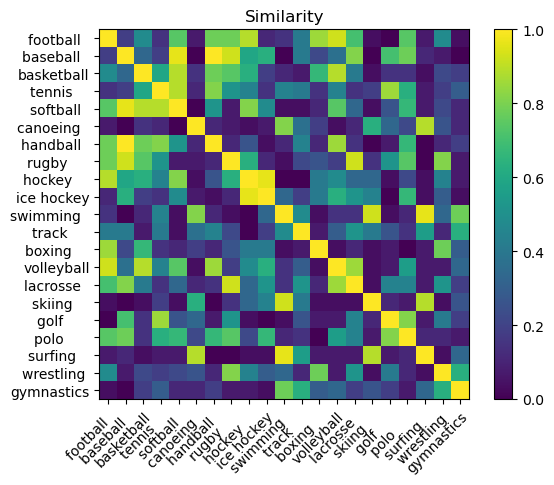

In [16]:
figure, axis = plt.subplots()

#YOUR CODE HERE

im = axis.imshow(similarity)
cbar = axis.figure.colorbar(im)


axis.set_xticks(np.arange(len(sport_names)), labels=sport_names)
axis.set_yticks(np.arange(len(sport_names)), labels=sport_names)

plt.setp(axis.get_xticklabels(), rotation=45, ha="right", rotation_mode='anchor')

axis.set_title("Similarity")


figure.savefig('PS2_Q6.png')

## Q7 Distance [2 pts, SOLO]

To implement MDS, we need a measure of psychological **distance**. The dataset includes measures of similarity, not distance. 

Here we will use **d = 1-s** as a  method to transform similarity (**s**) to distance (**d**).  

Write a function called **similarity_to_distance** that converts all similarity measures in the dataset into distances, using the above provided transformation method. The function should return the output called **distance**.

Plot a scatterplot of the dataset's distances (x axis) against their similarity (y axis). Label your figure. 


Hints:

- Similarity and distance matrices should have the same dimension (21-by-21).
- Output of the distance function (the distance matrix) variable will be used as an input in some of the functions you'll write in the following questions.


Upload figure PS2_Q7.png to Gradescope.


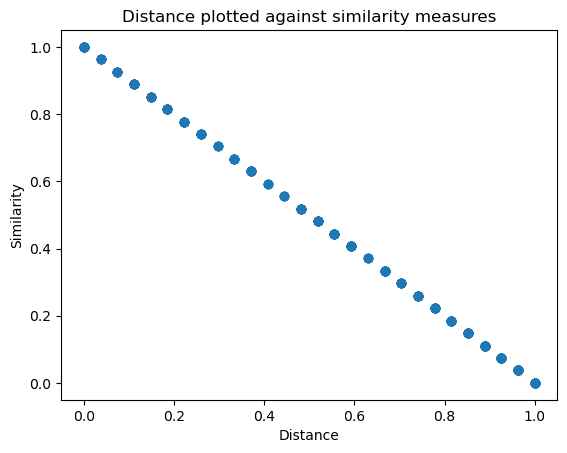

In [17]:
def similarity_to_distance(s):
    """
    input: similarity rating 
    """ 
    return 1-s

#YOUR CODE HERE

distance = similarity_to_distance(similarity)

figure, axis = plt.subplots()

axis.scatter(distance, similarity)

axis.set_xlabel('Distance')
axis.set_ylabel('Similarity')
axis.set_title('Distance plotted against similarity measures')

#YOUR CODE HERE

figure.savefig('PS2_Q7.png')

## Q8 Stress [5 pts, SOLO] 

To perform MDS, we will try to find, for each sport *i* in *[1,...,n]*, a position $p_i=(x_i,y_i)$ in the 2-D space that captures the participants’ similarities.
 
To do so, we will build an algorithm that minimizes the stress (defined below).  

We’ll define stress as follows: the squared difference between psychological distance $\psi_{ij}= (1-s_{ij})$ and the MDS distance in 2-D space: 

$$ \mathrm{Stress \ S} = \sum_{i=1}^n\sum_{j=1}^{n} (\psi_{ij} - \text{ED}_{ij})^2$$

where:

- i and j are different sports
- n is the total number of sports
- $\psi$ is the psychological distance between sport i and sport j that was reported by subjects: this is your output of `similarity_to_distance` function from the previous question.
- ED is the **Euclidean distance**: $\text{ED}_{i,j}=\sqrt{(x_i-x_j)^2 + (y_i-y_j)^2}$, which corresponds to the distance in 2-D space. Thus, ED is calculated based on the positions $p_i$ and $p_j$ of sports i and j in the 2-D space. Each position p is defined by the (x,y) coordinates.  

1) Write a function that computes the Euclidean Distance between two points $p_1$ and $p_2$.

2) Write a function that takes:

    - (n x 2) matrix of $(x,y)$ positions for each sport; (n = the number of sports)
    - the psychological distance from previous question
    
   and computes the stress based on the equation above.



Copy the `StressCalc` function into Gradescope.

In [18]:
#YOUR CODE HERE

def EuclideanDistance(p1,p2):
    ''' Takes positions defined by p1 and p2, and returns a euclidean distance value (single number).
    Implement EQ equation provided in the question. Hint: if p1=p2, the function should return the value of 0'''
    
    #YOUR CODE HERE
    ED = np.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)
    return ED




def StressCalc(positions, distance):
    ''' Takes positions (n,2) and (n,n) matrix of distance measures
    (You will use the distance matrix from Q7). 
    Uses these distances and the EuclideanDistance function above which computes ED based on positions
    to calculate the Stress between psychological and ED distances, according to the provided formula.''' 
    
    #YOUR CODE HERE
    
    n = len(positions)
    stress = 0
    
    for i in np.arange(0, n-1):
        for j in np.arange(i+1, n):
            stress += (distance[i][j] - EuclideanDistance(positions[i], positions[j]))**2
    
    return stress
    

In [19]:
positions = np.ones((len(similarity),2))

print(['Stress value should be 111.57. Output stress value is: ' + str(np.round(StressCalc(positions, distance), 2))])

['Stress value should be 111.57. Output stress value is: 111.57']


## Q9 Gradient [10 pts, HELP]
To move the positions in a direction that minimizes the stress, we will numerically compute the gradient using a multidimensional version of the simple rule for derivatives:

$$ \frac{df}{dp}(p) = \frac{f(p+\delta)-f(p-\delta)}{2\delta}$$

where $\delta$ takes on a small value, and $f$ is the stress function you wrote in the previous question. To compute the gradient, we will compute this approximate derivative with respect to each coordinate of each point.

Write a function that takes an n-by-2 matrix (n=number of sports) of (x,y) positions for each sport and computes the gradient (i.e. applies the numerical rule above to each coordinate location). This should return an n-by-2 gradient matrix. For example, the (i,2) value of the gradient vector should be computed as:

$$ \frac{\partial \text{Stress}}{\partial y_i}(p) = \frac{\text{Stress}((x_i,y_i+\delta))-\text{Stress}((x_i,y_i-\delta))}{2\delta}$$

Use $\delta$ = 0.01, unless a question specifically asks you to use a different value.

Copy your code into Gradescope.

In [20]:
delta = .01
def Gradient(delta, positions, distance):
    """
    The function should take in positions of each sport defined by (x,y) coordinates and apply the equation above 
    to each coordinate location. 
    
    Your gradient function should return a n-by-2 gradient matrix.
    
    """
    
    #YOUR CODE HERE
    
    gradient_matrix = np.ones((len(positions), 2))
    
    for x in np.arange(0, len(positions)):
        for y in np.arange(0,2):
            positions_plus = np.copy(positions)
            positions_plus[x][y] += delta
        
            positions_minus = np.copy(positions)
            positions_minus[x][y] -= delta
        
            gradient_matrix[x][y] = (StressCalc(positions_plus, distance) - StressCalc(positions_minus, distance)) / (2*delta)
            
    return gradient_matrix

## Q10.1 MDS [10 pts, HELP]

Write the MDS code: the code that follows a gradient in order to find positions that minimize the stress.

Initalize positions to be random, and be sure to take small steps in the direction of the gradient (e.g. $\alpha$\*gradient, with step size $\alpha=0.01$).

Use 100 steps of gradient descent.

Your function should return the final positions, and an array storing stress values across all MDS iterations.

Copy your code in Gradescope.


Hints:
- Initialize an n-by-2 matrix of random positions 
- Compute stress using `StressCalc` based on the initial positions
- Run MDS for a given number of steps where you will 1) modify your current step positions on each iteration based on the output of the Gradient function and 2) compute stress based on the newly adjusted positions using `StressCalc`.

In [34]:
delta = .01
alpha = .01
n_steps = 100

def MDS(positions,alpha,delta,n_steps,distance):
    """
    Function should take in the positions and MDS/gradient parameters (alpha,delta,n_steps)
    and apply the gradient to find new positions and compute stress based on the new positions. 
    
    Function should return the matrix of final positions and an array of stress values stored on each MDS iteration.
    """

    #YOUR CODE HERE
    
    pos = np.random.rand(len(positions), 2)
    
    stress = [StressCalc(pos, distance)]
    
    for i in np.arange(0, n_steps):
        gradient = Gradient(delta, pos, distance)
        pos -= alpha*gradient
        stress.append(StressCalc(pos, distance))
        
    return (pos, stress)

final_coords, stress = MDS(positions, alpha, delta, n_steps, distance)

## Q10.2 [5 pts, SOLO]
Plot the names of sports at the resulting final coordinates obtained from the previous question.

Hint: look up `axis.text` for plotting the sports names.

Upload PS2_Q10_2.png to Gradescope.

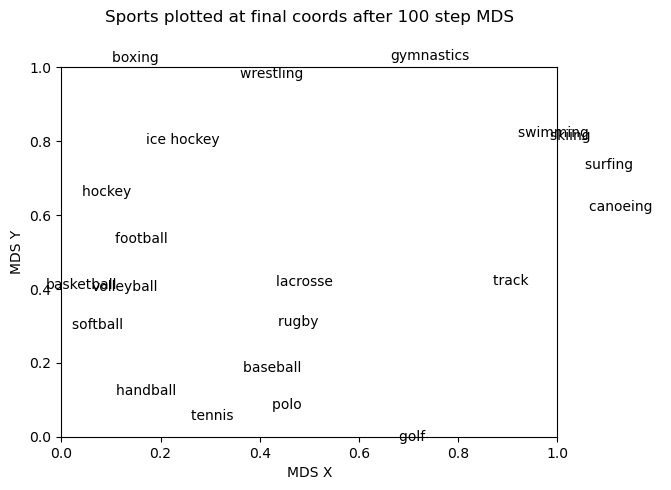

In [35]:
figure, axis = plt.subplots()
#YOUR CODE HERE

x, y = final_coords.T

i = 0
for sport in sport_names:
    axis.text(x[i], y[i], sport)
    i += 1
    
axis.set_xlabel('MDS X')
axis.set_ylabel('MDS Y')
axis.set_title('Sports plotted at final coords after 100 step MDS', x = 0.5, y = 1.1)

figure.savefig('PS2_Q10_2.png')

## Q10.3 [5 pts, SOLO]
Plot the stress as a function of step number (x axis = step number, y axis = stress).

Upload PS2_Q10_3.png in Gradescope.

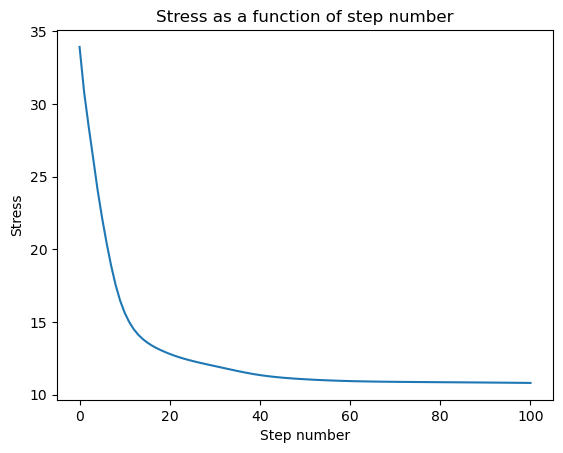

In [23]:
figure, axis = plt.subplots()
#YOUR CODE HERE
axis.plot(np.arange(n_steps+1), stress)

axis.set_xlabel('Step number')
axis.set_ylabel('Stress')
axis.set_title('Stress as a function of step number')

figure.savefig('PS2_Q10_3.png')

## Q11 Validation [5pts, SOLO] 

Make a scatter plot of the distances obtained by running your MDS function on people's reported distances *d=(1-s)* (the distances computed based on similarity ratings in Q7).

Specifically, use the output from Q10.1 to calculate distances using ED function, and then compare those distances to psychological distances from Q7 by creating a scatter plot. 

Briefly describe what a good and bad MDS-psychological distance relationship would look like, and whether yours is good or bad. Enter your response in Gradescope.


Hints:
- Your MDS distance matrix should have the same dimension as psychological distance matrix (e.g. 21-by-21)
- Look up `flatten()` function

Upload PS2_Q11.png to Gradescope.

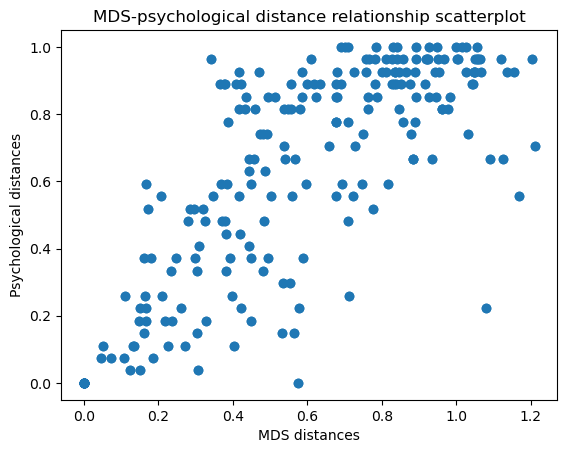

In [24]:
#YOUR CODE HERE

figure, axis = plt.subplots()

i=0
j=0

final_distances = np.zeros((21,21))

for coord1 in final_coords:
    for coord2 in final_coords:
        final_distances[i][j] = EuclideanDistance(coord1, coord2)
        j += 1
    i += 1
    j = 0

x = final_distances.flatten()
y = distance.flatten()

axis.scatter(x,y)
axis.set_xlabel('MDS distances')
axis.set_ylabel('Psychological distances')
axis.set_title('MDS-psychological distance relationship scatterplot')

#YOUR CODE HERE

figure.savefig('PS2_Q11.png')

## Q12.1 Iterating MDS [3pts, SOLO]
Run your MDS code 9 times, and plot the corresponding final positions in a figure with subplots in a 3x3 grid. Indicate the code iteration number in each subplot title. Scale the figure size using figsize=(15,15). 

Are they all the same or not? Why? Enter your response in Gradescope.

Enter your answer in Gradescope, and upload PS2_Q12_1.png.

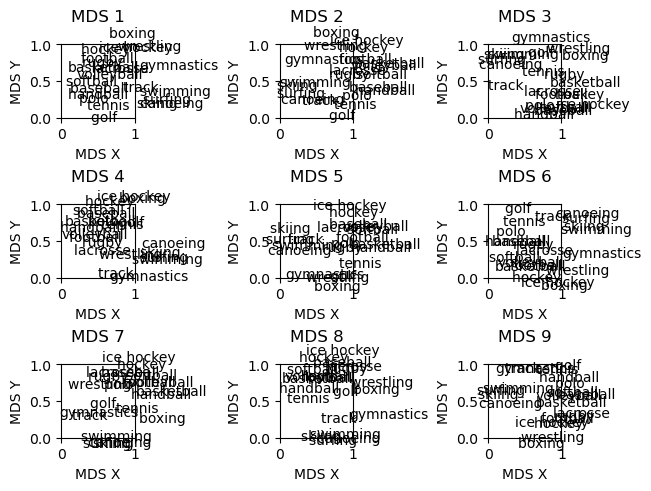

<Figure size 1500x1500 with 0 Axes>

In [25]:
## YOUR CODE HERE

figure, axis = plt.subplots(nrows=3, ncols=3, layout='constrained')
plt.figure(figsize=(15,15))

## YOUR CODE HERE

i = 1
stress_arr = []
for ax in axis.flat:
    coords, stress = MDS(positions, alpha, delta, n_steps, distance)
    stress_arr.append(stress)
    x, y = coords.T

    j = 0
    for sport in sport_names:
        ax.text(x[j], y[j], sport)
        j += 1
        
    ax.set_title(f'MDS {i}', y = 1.2)
    ax.set_xlabel('MDS X')
    ax.set_ylabel('MDS Y')
    i += 1

figure.savefig('PS2_Q12_1.png')

## Q12.2 Best representation [3pts, SOLO]
In another figure, plot the final stress value as a function of the MDS iteration in the previous question. If you wanted to pick the best final representation based on this plot, how would you do it? What criteria would you use? Which iteration is your best?

Enter your answer in Gradescope, and upload PS2_Q12_2.png.

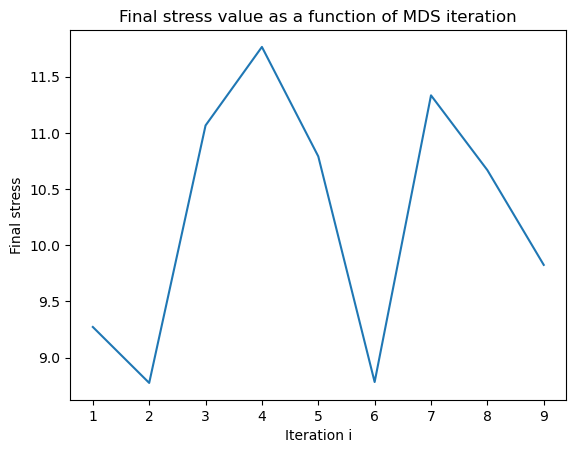

In [26]:
#YOUR CODE HERE

figure, axis = plt.subplots()

mds_itr = np.arange(1, 10)
final_stress = []

for itr in stress_arr:
    final_stress.append(itr[-1])
    
axis.plot(mds_itr, final_stress)
axis.set_xlabel('Iteration i')
axis.set_ylabel('Final stress')
axis.set_title('Final stress value as a function of MDS iteration')


#YOUR CODE HERE

figure.savefig('PS2_Q12_2.png')

## Q12.3 [4pts, SOLO]
Do your best results agree with your intuitions about how this domain might be organized? Why or why not? Answer in 2-3 sentences in Gradescope.

## Q13 [5pts, SOLO]

Run MDS 2 times, with 2 different step sizes (α=.02 and  α=.05). Plot Stress over time for each run in the same plot. Don't forget to add a legend, labeling which MDS step size the line refers to, in addition to the usual axis labels and title. 

What happens if you use a bigger step in your MDS? Why?

Enter your answer in Gradescope, and upload PS2_Q13.png.

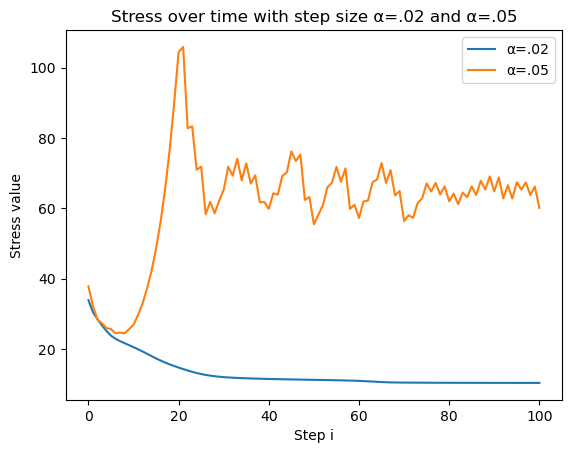

In [27]:
#YOUR CODE HERE

figure, axis = plt.subplots()

#YOUR CODE HERE

coords_2, stress_2 = MDS(positions, .02, delta, n_steps, distance)
coords_5, stress_5 = MDS(positions, .05, delta, n_steps, distance)

steps = np.arange(0, n_steps+1)

axis.plot(steps, stress_2, label='α=.02')
axis.plot(steps, stress_5, label='α=.05')
axis.legend()

axis.set_xlabel('Step i')
axis.set_ylabel('Stress value')
axis.set_title('Stress over time with step size α=.02 and α=.05')

figure.savefig('PS2_Q13.png')

<div style="background-color: #c1f2a5">

# Submission

    
When you're done with your problem set, do the following:
- Upload your answers in Gradescope's PS2.
- Convert your Jupyter Notebook into a `.py` file by doing so:    
    
Click on File -> Save notebook as... -> change the .ipynb extension to .py. 


